In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data = pd.read_csv('logistic regression_data.txt',
                     header=None,
                     names=['EX1','EX2','Admitted'])
data.head(5)

,EX1,EX2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.shape

(100, 3)

In [4]:
positive = data[data['Admitted'] == 1]
negative= data[data['Admitted'] == 0]
positive.head(5)

,EX1,EX2,Admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


Text(0,0.5,'Ex 2 Score')

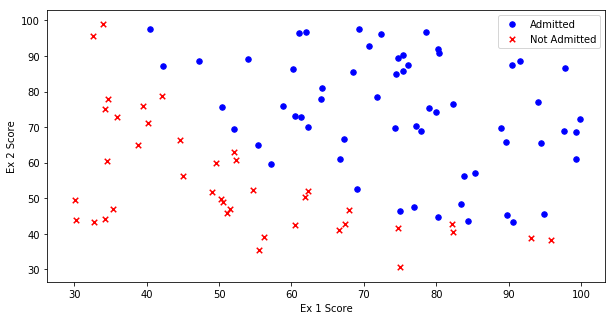

In [5]:
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(positive['EX1'],
           positive['EX2'],
           s=30,
           c='b',
           marker='o',
           label='Admitted')
ax.scatter(negative['EX1'],
           negative['EX2'],
           s=30,
           c='r',
           marker='x',
           label='Not Admitted')
ax.legend()
ax.set_xlabel('Ex 1 Score')
ax.set_ylabel('Ex 2 Score')

目标：建立分类器（求解出三个参数 $\theta_0         \theta_1         \theta_2 $）


设定阈值，根据阈值判断录取结果

### 要完成的模块
-  `sigmoid` : 映射到概率的函数

-  `model` : 返回预测结果值

-  `cost` : 根据参数计算损失

-  `gradient` : 计算每个参数的梯度方向

-  `descent` : 进行参数更新

-  `accuracy`: 计算精度

###  `sigmoid` 函数

$$
g(z) = \frac{1}{1+e^{-z}}   
$$

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

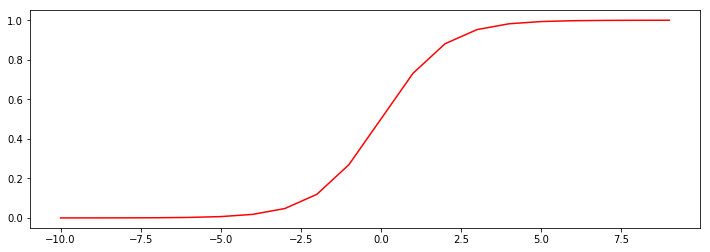

In [7]:
nums = np.arange(-10,10,step=1) #创建数组
fig,ax =plt.subplots(figsize=(12,4))
ax.plot(nums,sigmoid(nums),'r')

### Sigmoid
* $g:\mathbb{R} \to [0,1]$
* $g(0)=0.5$
* $g(- \infty)=0$
* $g(+ \infty)=1$

In [8]:
#预测函数
def model(x,theta):
    return sigmoid(np.dot(x,theta.T))

$$
\begin{array}{ccc}
\begin{pmatrix}\theta_{0} & \theta_{1} & \theta_{2}
\end{pmatrix} & \times & 
\begin{pmatrix}1\\
x_{1}\\
x_{2}
\end{pmatrix}
\end{array}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}
$$

In [9]:
data.insert(0,'ones',1) #对应theta0
matrix_data = data.as_matrix() #数据集矩阵化

In [10]:
columns = matrix_data.shape[1]
x = matrix_data[:,0:columns - 1]
y = matrix_data[:,columns - 1:columns] 

In [11]:
theta = np.zeros([1,3])
theta

array([[0., 0., 0.]])

In [12]:
x[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

### 损失函数
将对数似然函数去负号

$$
D(h_\theta(x), y) = -y\log(h_\theta(x)) - (1-y)\log(1-h_\theta(x))
$$
求平均损失
$$
J(\theta)=\frac{1}{n}\sum_{i=1}^{n} D(h_\theta(x_i), y_i)
$$

In [13]:
def cost(x,y,theta):
    left = np.multiply(-y,np.log(model(x,theta)))
    right = np.multiply(1 - y,np.log(1 - model(x,theta)))
    return np.sum((left - right) / len(x))

In [14]:
cost(x,y,theta)

0.6931471805599457

### 计算梯度


$$
\frac{\partial J}{\partial \theta_j}=-\frac{1}{m}\sum_{i=1}^n (y_i - h_\theta (x_i))x_{ij}
$$

In [26]:
def gradient_descent(x,y,theta):
    gradient = np.zeros(theta.shape)
    for j in range(len(theta.ravel())):
        term = np.multiply((model(x,theta) - y).ravel(),x[:,j])
        gradient[0,j] = np.sum(term) / len(x)
    return gradient

<h2>比较三种不同梯度下降法<h2>

In [16]:
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

def stopCriterion(type, value, threshold):
    #设定三种不同的停止策略
    if type == STOP_ITER:        return value > threshold
    elif type == STOP_COST:      return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:      return np.linalg.norm(value) < threshold

In [17]:
import numpy.random
#洗牌
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return X, y

In [29]:
import time

def descent(data, theta, batchSize, stopType, thresh, alpha):
    #梯度下降求解
    
    #初始化
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # batch
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape) # 计算的梯度
    costs = [cost(X, y, theta)] # 损失值

    
    while True:
        gradient = gradient_descent(X[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize #取batch数量个数据
        if k >= n: 
            k = 0 
            X, y = shuffleData(data) #重新洗牌
        theta = theta - alpha*gradient # 参数更新
        costs.append(cost(X, y, theta)) # 计算新的损失
        i += 1 

        if stopType == STOP_ITER:       value = i
        elif stopType == STOP_COST:     value = costs
        elif stopType == STOP_GRAD:     value = gradient
        if stopCriterion(stopType, value, thresh): break
    
    return theta, i-1, costs, gradient, time.time() - init_time

In [19]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    #import pdb; pdb.set_trace();
    theta, iter, costs, gradient, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

### 不同的停止策略

##### 设定迭代次数

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 1.00s


array([[-0.00027127,  0.00705232,  0.00376711]])

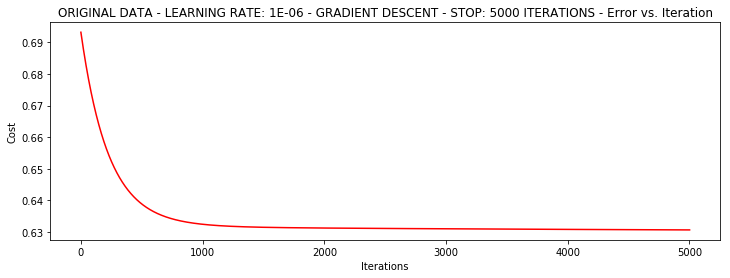

In [28]:
#选择的梯度下降方法是基于所有样本的
n=100
runExpe(matrix_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)